# Clustering

In [4]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

In [5]:
votes = pd.read_csv('114_congress.csv')

In [6]:
votes.head(3)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


In [7]:
votes['party'].value_counts()

R    54
D    44
I     2
Name: party, dtype: int64

In [8]:
votes.mean()

/var/folders/13/2bs52tzx5vb8jg2f094msm5h0000gn/T/ipykernel_1386/3004162518.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  votes.mean()


00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64

In [9]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    100 non-null    object 
 1   party   100 non-null    object 
 2   state   100 non-null    object 
 3   00001   100 non-null    float64
 4   00004   100 non-null    float64
 5   00005   100 non-null    float64
 6   00006   100 non-null    float64
 7   00007   100 non-null    float64
 8   00008   100 non-null    float64
 9   00009   100 non-null    float64
 10  00010   100 non-null    float64
 11  00020   100 non-null    float64
 12  00026   100 non-null    float64
 13  00032   100 non-null    float64
 14  00038   100 non-null    float64
 15  00039   100 non-null    float64
 16  00044   100 non-null    float64
 17  00047   100 non-null    float64
dtypes: float64(15), object(3)
memory usage: 14.2+ KB


# Distance between senators

In [10]:
votes.head(2)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [11]:
votes.iloc[0:2, 3:]

,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [12]:
from sklearn.metrics.pairwise import euclidean_distances

In [13]:
euclidean_distances(votes.iloc[0, 3:].values.reshape(1, -1), votes.iloc[1, 3:].values.reshape(1, -1))

array([[1.73205081]])

In [14]:
distance = euclidean_distances(votes.iloc[0, 3:].values.reshape(1, -1), votes.iloc[2, 3:].values.reshape(1, -1))

In [15]:
distance

array([[3.31662479]])

# Clustering

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans_model = KMeans(n_clusters=2, random_state=1)

In [18]:
senator_distances = kmeans_model.fit_transform(votes.iloc[0:,3:])

In [19]:
senator_distances

array([[3.12141628, 1.3134775 ],
       [2.6146248 , 2.05339992],
       [0.33960656, 3.41651746],
       [3.42004795, 0.24198446],
       [1.43833966, 2.96866004],
       [0.33960656, 3.41651746],
       [3.42004795, 0.24198446],
       [0.33960656, 3.41651746],
       [3.42004795, 0.24198446],
       [0.31287498, 3.30758755],
       [0.33960656, 3.41651746],
       [3.27058526, 0.96734144],
       [0.33960656, 3.41651746],
       [3.34875646, 0.53945585],
       [0.33960656, 3.41651746],
       [1.18084816, 3.12695614],
       [1.23852221, 3.13536063],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [2.6146248 , 2.05339992],
       [0.58487332, 3.31421108],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [3.56324683, 0.93036231],
       [3.42004795, 0.24198446],
       [1.73847904, 2.82326711],
       [0.33960656, 3.41651746],
       [3.

In [20]:
labels = kmeans_model.labels_

In [21]:
labels

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int32)

In [23]:
pd.crosstab(labels, votes['party'])

party,D,I,R
row_0,,,
0,41,2,0
1,3,0,54


# Explore senators in the wrong cluster

In [26]:
democratic_outliers = votes[(labels == 1) & (votes['party'] == 'D')]

In [27]:
democratic_outliers

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


# Plot clusters

In [28]:
import matplotlib.pyplot as plt

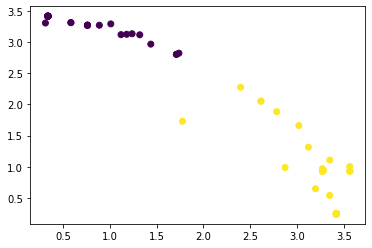

In [31]:
plt.scatter(x=senator_distances[:,0], y=senator_distances[:,1], c=labels)
plt.show()